<a href="https://colab.research.google.com/github/dpshepherd/PHY452_F2023/blob/main/PHY452_F2024_Lab2_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries to perform fitting

In [1]:
!pip install imagecodecs

In [2]:
from tifffile import imread
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
%matplotlib inline

### Define physical constants for the lab setup

In [3]:
lambda_light = 0.000532     # Wavelength of laser in mm
f1 = 75.0                  # Focal length of lens 1 in mm
f2 = 75.0                  # Focal length of lens 2 in mm
M = f2/f1                   # Magnification
pixel_spacing = 0.0069 / M  # Pixel spacing in mm accounting for magnification change

### Upload image of diffraction pattern and import as numpy array

In [33]:
uploaded = files.upload()
dict_keys = uploaded.keys()
image_name = list(dict_keys)[0]
image_data = imread(image_name,is_ome=False)

Saving background.tiff to background (1).tiff


### Plot image of diffraction pattern, line cut across pattern, and fourier transform of the 1D line cut. The line cut is normalized by the peak intensity.

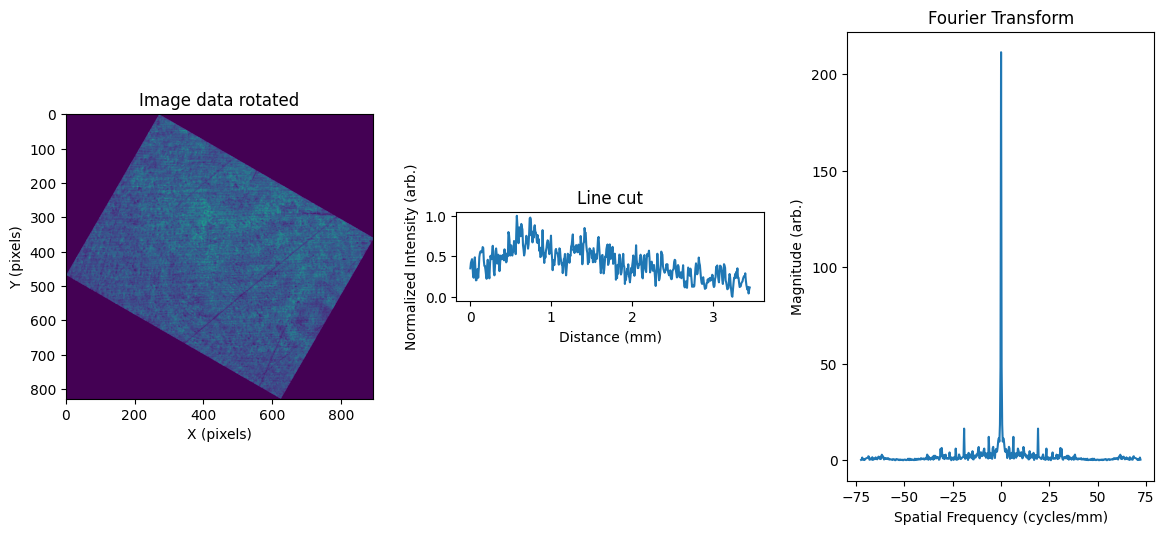

In [25]:
# rotate image to align pattern with yx axes
image_data_rotated = rotate(image_data,-30,order=2)

# take line cut in the middle of the image
middle_line_cut = np.sum(
    image_data_rotated[
        200:700,
        image_data_rotated.shape[1]//2-50:image_data_rotated.shape[1]//2+50,
        ],
    axis=1)
middle_line_cut = middle_line_cut - np.min(middle_line_cut)
middle_line_cut = middle_line_cut / np.max(middle_line_cut)
xdata = np.linspace(0,len(middle_line_cut),len(middle_line_cut))*pixel_spacing

# Discrete Fourier Transform of the middle_line_cut
fft_data = np.fft.fft(middle_line_cut-np.min(middle_line_cut))
fft_magnitude = np.abs(fft_data)

# Calculate corresponding frequencies (in cycles per mm)
freqs = np.fft.fftfreq(len(middle_line_cut), d=pixel_spacing)

# Plot the data
fig, ax = plt.subplots(1, 3, figsize=(12, 12))

ax[0].imshow(image_data_rotated)
ax[0].title.set_text('Image data rotated')
ax[0].set_xlabel('X (pixels)')
ax[0].set_ylabel('Y (pixels)')
ax[0].set_aspect('equal')

ax[1].plot(xdata,middle_line_cut)
ax[1].title.set_text('Line cut')
ax[1].set_xlabel('Distance (mm)')
ax[1].set_ylabel('Normalized Intensity (arb.)')
ax[1].set_aspect('equal')

ax[2].plot(np.fft.fftshift(freqs), np.fft.fftshift(fft_magnitude))
ax[2].title.set_text('Fourier Transform')
ax[2].set_xlabel('Spatial Frequency (cycles/mm)')
ax[2].set_ylabel('Magnitude (arb.)')
ax[2].set_aspect('equal')

fig.tight_layout(pad=2.0)

#What is the diffraction grating spacing, based on the 1D Fourier Transforms of the different patterns?